In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 


In [38]:
steps = pd.read_csv("steps.csv", sep=';')
surv = pd.read_csv("survey.csv")
print(steps.head())
print(surv.head())



   id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0   1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1   2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
2   3        NaN    11428.0    12523.0     2553.0      190.0     2164.0   
3   4        NaN        NaN        NaN        NaN        NaN        NaN   
4   5        NaN        NaN        NaN        NaN        NaN        NaN   

   26-6-2013  27-6-2013  28-6-2013  ...  4-5-2014  5-5-2014  6-5-2014  \
0     9929.0    12879.0    10541.0  ...       NaN       NaN       NaN   
1     4024.0     3926.0    14595.0  ...       NaN       NaN       NaN   
2     8185.0     9630.0     8983.0  ...    3914.0    4364.0       NaN   
3        NaN        NaN        NaN  ...       NaN       NaN       NaN   
4        NaN        NaN        NaN  ...       NaN       NaN       NaN   

   7-5-2014  8-5-2014  9-5-2014  10-5-2014  11-5-2014  12-5-2014  13-5-2014  
0       NaN       NaN       NaN 

In [39]:
df = pd.merge(steps, surv, on='id')
def above_200(x):
    if(x > 200 or x < 40): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(above_200)


C:\Users\robbi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight'>

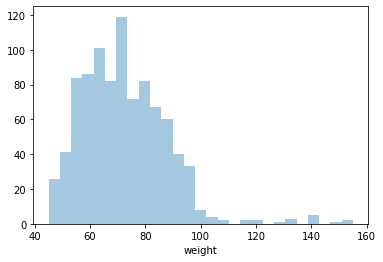

In [40]:
sns.distplot(df['weight'].dropna(), kde=False)


In [41]:
df['mean_steps'] = df.loc[:, '20-6-2013' : '13-5-2014'].mean(axis = 1).round(decimals = 1)
df['med_steps'] = df.loc[:, '20-6-2013' : '13-5-2014'].median(axis = 1).round(decimals = 1)
med_steps = df['med_steps'].median()
mean_steps = df['mean_steps'].mean()
med_steps, mean_steps

(5793.0, 7036.626702702702)

In [42]:
def above_25000(x):
    if(x > 25000):
        return float('NaN')
    else:
        return x
df['mean_steps'] = df['mean_steps'].apply(above_25000)
df

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean_steps,med_steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.5,9860.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.4,5374.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.7,8220.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.2,3000.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.1,4986.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,NaN,4571.0,10471.0,5899.0,15295.0,9178.0,9348.0,12229.0,13767.0,...,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,6282.1,6104.0
925,926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lille,Male,<25,3,5,Bachelor,192.0,90.0,4799.9,4240.0
926,927,NaN,NaN,NaN,1623.0,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,10030.3,8849.0
927,928,NaN,NaN,14411.0,14364.0,26629.0,13092.0,9266.0,14949.0,43238.0,...,Lille,Female,55-64,1,1,High school,172.0,65.0,15679.7,14084.0


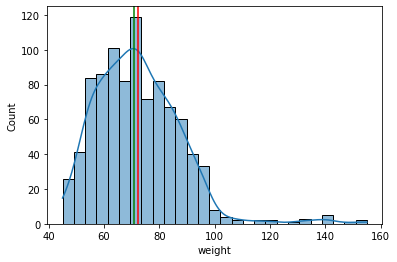

In [43]:
sns.histplot(df['weight'], kde= True)
plt.axvline(df['weight'].median(), 0, 100, color='green', label='median')
plt.axvline(df['weight'].mean(), 0, 100, color='red', label='mean')

The distribution is: 

    -Normal, with a min and max cut-off
    -Low
    -1 peak so its unimodal
    -Right skewed
    -A few outliers

In [51]:
df['mean_steps'].describe()

count      921.000000
mean      6703.995548
std       2948.662611
min          4.000000
25%       4634.400000
50%       6240.100000
75%       8327.500000
max      22842.700000
Name: mean_steps, dtype: float64

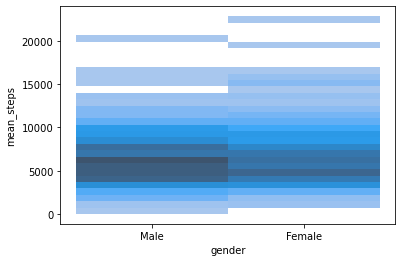

In [58]:
sns.histplot(x="gender", y='mean_steps', data=df)
plt.show()


<AxesSubplot:xlabel='gender', ylabel='mean_steps'>

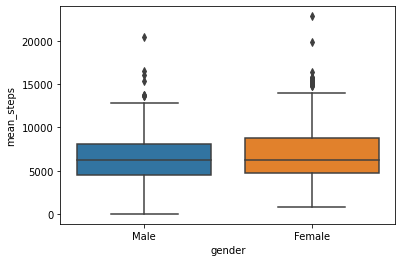

In [63]:
sns.boxplot(x=df['gender'], y=df['mean_steps'])

<AxesSubplot:xlabel='city', ylabel='mean_steps'>

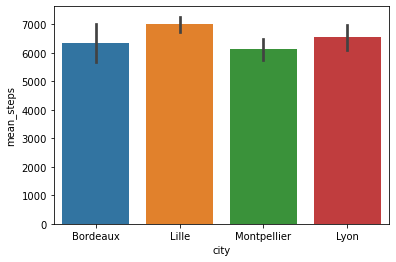

In [69]:
sns.barplot(x=df['city'], y=df['mean_steps'])

<AxesSubplot:xlabel='city', ylabel='weight'>

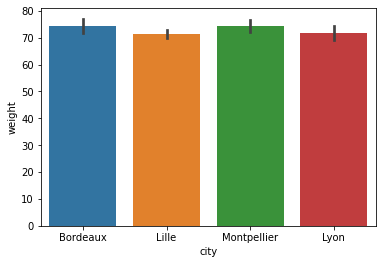

In [68]:
sns.barplot(x=df['city'], y=df['weight'])

Observations:
- People in Lille have the highest mean steps taken
- On average, females walk more steps than men
- The distribution of mean steps for females is wider than for males
- The higher the average weight, the lower the mean steps